In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, plot_confusion_matrix

%matplotlib inline

In [2]:
mnist_data_train = pd.read_csv("C:/Users/shadm/Desktop/MNIST/mnist_train.csv")
mnist_data_test = pd.read_csv("C:/Users/shadm/Desktop/MNIST/mnist_test.csv")

In [3]:
Data_train = mnist_data_train.to_numpy()
np.random.seed = 0
DT = Data_train[np.random.permutation(Data_train.shape[0])]

y_train = DT[:, 0]
X_train = DT[:, 1:]

Data_test = mnist_data_test.to_numpy()

X_test = Data_test[:, 1:]
y_test = Data_test[:, 0]

In [11]:
X_train_std = X_train/255
X_test_std = X_test/255

X_tr = X_train_std[:4800]
X_val = X_train_std[4800:6000]

y_tr = y_train[:4800]
y_val = y_train[4800:6000]

# Logistic Regression

In [ ]:
train_scores_LR = []
test_scores_LR = []
for c in np.arange(1, 5, 0.1):
    clf = LogisticRegression(C=c, penalty='l2', multi_class='ovr', n_jobs=-1, class_weight='balanced', max_iter=5)
    clf.fit(X_tr, y_tr)

    train_scores_LR.append(clf.score(X_tr, y_tr))
    test_scores_LR.append(clf.score(X_test_std, y_test))

plt.figure(figsize=(15, 15))  
plt.plot(np.arange(0.1, 10, 1), np.array(train_scores_LR), 'bo')
plt.plot(np.arange(0.1, 10, 1), np.array(test_scores_LR), 'ro') 

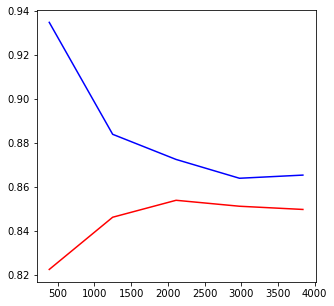

In [5]:
clf_LR = LogisticRegression(C=0.1, penalty='l2', multi_class='ovr', n_jobs=-1, class_weight='balanced', max_iter=5)
clf_LR.fit(X_tr, y_tr)

train_size_LR, train_score_lr, test_score_lr = learning_curve(clf_LR, X_tr, y_tr, cv=5)

plt.figure(figsize=(5, 5))
plt.plot(train_size_LR, train_score_lr.mean(axis=1), 'b-')
plt.plot(train_size_LR, test_score_lr.mean(axis=1), 'r-')

# Precision

In [15]:
h_val = clf_LR.predict(X_val)

print('validation precision:', precision_score(y_val, h_val, average='weighted'))

validation precision: 0.8478879367260455


# KNN

In [ ]:
train_scores_KNN = []
test_scores_KNN = []
for k in np.arange(1, 100, 5):
    clf = KNeighborsClassifier(n_neighbors=k, n_jobs=-1, weights='uniform')
    clf.fit(X_tr, y_tr)
    
    train_scores_KNN.append(clf.score(X_tr, y_tr))
    test_scores_KNN.append(clf.score(X_test_std, y_test))

plt.figure(figsize=(15, 15))    
plt.plot(np.arange(0.1, 10, 1), np.array(train_scores_KNN), 'bo')
plt.plot(np.arange(0.1, 10, 1), np.array(test_scores_KNN), 'ro') 

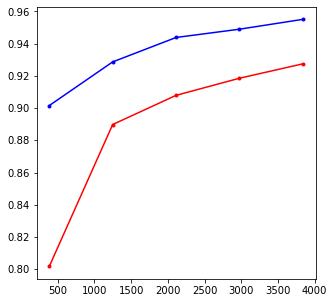

In [14]:
clf_KNN = KNeighborsClassifier(n_neighbors=5, n_jobs=-1, weights='uniform')
clf_KNN.fit(X_tr, y_tr)

train_size_KNN, train_score_knn, test_score_knn = learning_curve(clf_KNN, X_tr, y_tr, cv=5)

plt.figure(figsize=(5, 5)) 
plt.plot(train_size_KNN, train_score_knn.mean(axis=1), 'b.-')
plt.plot(train_size_KNN, test_score_knn.mean(axis=1), 'r.-')

In [16]:
h_val = clf_KNN.predict(X_val)

print('validation precision:', precision_score(y_val, h_val, average='weighted'))

validation precision: 0.9386416851542729


# SVM

In [ ]:
train_scores_SVM = []
test_scores_SVM = []
for c in np.arange(0.1, 10, 1):
    clf = SVC(C=c, kernel='rbf', class_weight='balanced')
    clf.fit(X_tr, y_tr)
    
    train_scores_SVM.append(clf.score(X_tr, y_tr))
    test_scores_SVM.append(clf.score(X_test_std, y_test))

plt.figure(figsize=(15, 15)) 
plt.plot(np.arange(0.1, 10, 1), np.array(train_scores_SVM), 'bo')
plt.plot(np.arange(0.1, 10, 1), np.array(test_scores_SVM), 'ro')

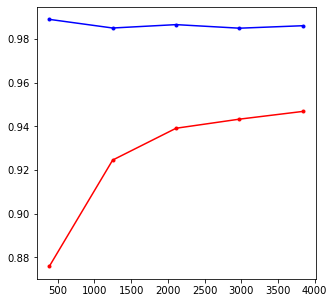

In [17]:
clf_SVM = SVC(C=1, kernel='rbf', class_weight='balanced')
clf_SVM.fit(X_tr, y_tr)

train_size_SVM, train_score_svm, test_score_svm = learning_curve(clf_SVM, X_tr, y_tr, cv=5)

plt.figure(figsize=(5, 5)) 
plt.plot(train_size_SVM, train_score_svm.mean(axis=1), 'b.-')
plt.plot(train_size_SVM, test_score_svm.mean(axis=1), 'r.-')

In [18]:
h_val = clf_SVM.predict(X_val)

print('validation precision:', precision_score(y_val, h_val, average='weighted'))

validation precision: 0.9538710155227972


# NEURAL NETWORK

In [ ]:
train_acc_NN = []
test_acc_NN = []

for nn in range(5, 200, 10):
    clf = MLPClassifier(hidden_layer_sizes=(nn,), activation='relu', max_iter=300, solver='sgd', learning_rate='adaptive')
    clf.fit(X_tr, y_tr)
    
    train_acc_NN.append(clf.score(X_tr, y_tr))
    test_acc_NN.append(clf.score(X_test_std, y_test))
    
plt.figure(figsize=(15, 15)) 
plt.plot(train_acc_NN, 'b-')
plt.plot(test_acc_NN, 'r-')

C:\Users\shadm\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\shadm\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\shadm\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\shadm\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) re

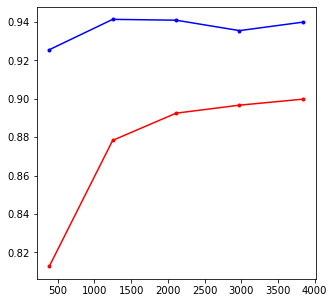

In [19]:
clf_NN = MLPClassifier(hidden_layer_sizes=(35,), activation='relu', max_iter=300, solver='sgd', learning_rate='adaptive')
clf_NN.fit(X_tr, y_tr)

train_size_NN, train_score_nn, test_score_nn = learning_curve(clf_NN, X_tr, y_tr, cv=5)

plt.figure(figsize=(5, 5))
plt.plot(train_size_NN, train_score_nn.mean(axis=1), 'b.-')
plt.plot(train_size_NN, test_score_nn.mean(axis=1), 'r.-')

In [20]:
h_val = clf_NN.predict(X_val)

print('validation precision:', precision_score(y_val, h_val, average='weighted'))

validation precision: 0.9144476064726892


# DECISION TREE

In [ ]:
train_scores_DT = []
test_scores_DT = []


for dt in range(1, 14):
    clf = DecisionTreeClassifier(max_depth=dt, class_weight='balanced')
    clf.fit(X_tr, y_tr)
    
    train_scores_DT.append(clf.score(X_tr, y_tr))
    test_scores_DT.append(clf.score(X_test_std, y_test))
    
plt.plot(np.arange(1, 14, 1) ,np.array(train_scores_DT), 'b-')
plt.plot(np.arange(1, 14, 1), np.array(test_scores_DT), 'r-')

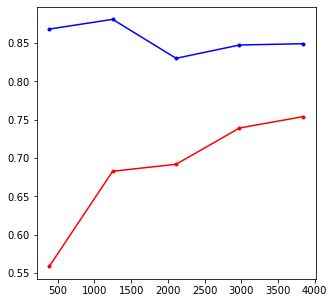

In [21]:
clf_DT = DecisionTreeClassifier(max_depth=7, class_weight='balanced')
clf_DT.fit(X_tr, y_tr)

train_size_DT, train_score_dt, test_score_dt = learning_curve(clf, X_tr, y_tr, cv=5 )

plt.figure(figsize=(5, 5))
plt.plot(train_size_DT, train_score_dt.mean(axis=1), 'b.-')
plt.plot(train_size_DT, test_score_dt.mean(axis=1), 'r.-')

In [22]:
h_val = clf_DT.predict(X_val)

print('validation precision:', precision_score(y_val, h_val, average='weighted'))

validation precision: 0.7624810173549547


# RandomForest

In [ ]:
train_acc =[]
test_acc = []

for n in range(1, 200, 10):
    clf = RandomForestClassifier(n_estimators=n, max_depth=7, n_jobs=-1, class_weight='balanced', criterion='entropy')
    clf.fit(X_tr, y_tr)
    
    train_acc.append(clf.score(X_tr, y_tr))
    test_acc.append(clf.score(X_test_std, y_test))
    
plt.plot(train_acc, 'b-')
plt.plot(test_acc, 'r-')

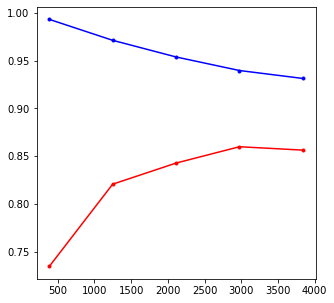

In [23]:
clf_RF = RandomForestClassifier(n_estimators=10, max_depth=7, n_jobs=-1, class_weight='balanced', criterion='entropy')
clf_RF.fit(X_tr, y_tr)

train_size_RF, train_score_rf, test_score_rf = learning_curve(clf_RF, X_tr, y_tr, cv=5 )

plt.figure(figsize=(5, 5))
plt.plot(train_size_RF, train_score_rf.mean(axis=1), 'b.-')
plt.plot(train_size_RF, test_score_rf.mean(axis=1), 'r.-')

In [24]:
h_val = clf_RF.predict(X_val)

print('validation precision:', precision_score(y_val, h_val, average='weighted'))

validation precision: 0.869088035761187


test score: 0.952
train score: 0.9860416666666667
***************
test precision: 0.9520673393814258
train precision: 0.9860847259331259
***************
test recall: 0.952
train recall: 0.9860416666666667
***************
test f1-score: 0.9519449617610635
train f1-score: 0.986042660007513


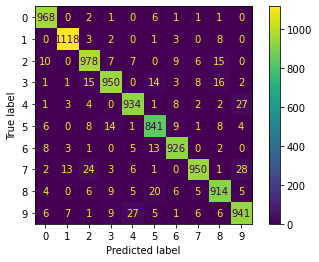

In [27]:
# Best score: SVM
h_tr = clf_SVM.predict(X_tr)
h_test = clf_SVM.predict(X_test_std)

# Precision, Recall, Accuracy, and f1_score
print('test score:', clf_SVM.score(X_test_std, y_test))
print('train score:', clf_SVM.score(X_tr, y_tr))
print('***************')
print('test precision:', precision_score(y_test, h_test, average='weighted'))
print('train precision:', precision_score(y_tr, h_tr, average='weighted'))
print('***************')
print('test recall:', recall_score(y_test, h_test, average='weighted'))
print('train recall:', recall_score(y_tr, h_tr, average='weighted'))
print('***************')
print('test f1-score:', f1_score(y_test, h_test, average='weighted'))
print('train f1-score:', f1_score(y_tr, h_tr, average='weighted'))

#Confiusion Matrix


class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
disp = plot_confusion_matrix(clf_SVM, X_test_std, y_test, display_labels = class_names)